### **Problema**
Una agencia inmobiliaria desea mejorar sus estrategias de venta y toma de decisiones al estimar los precios de las viviendas en una ciudad específica. Esta agencia cuenta con un conjunto de datos históricos que incluyen características de las propiedades (como número de habitaciones, baños, ubicación, antigüedad, entre otros) y sus precios de venta.

### **Objetivo**
El objetivo es construir un modelo de predicción que, a partir de las características de una casa, pueda estimar de manera precisa su precio en el mercado. Este modelo ayudará a la agencia a ofrecer estimaciones rápidas a sus clientes y a definir precios más competitivos basados en las características de cada propiedad.

### **Datos disponibles**
La agencia cuenta con un conjunto de datos que incluye las siguientes variables:

### **Superficie de la casa (en metros cuadrados)**

* id: Unique identifier for each property 
* date: Date of property listing 
* price: Property price in currency
* bedrooms: Number of bedrooms 
* bathrooms: Number of bathrooms
* sqft_living: Living area size in square feet
* sqft_lot: Total lot size in square feet
* floors: Number of floors
* waterfront: Indicates if property has waterfront view (0 for no, 1 for yes).
* view: Quality level of property view (0 to 4)
* condition: Overall condition rating (1 to 5)
* grade: Overall grade rating (1 to 13)
* sqft_above: Living area above ground level in square feet
* sqft_basement: Basement area in square feet
* yr_built: Year property was built
* yr_renovated: Year property was last renovated (0 if never)
* zipcode: Property location zip code
* lat: Latitude coordinate of property location
* long: Longitude coordinate of property location
* sqft_living15: Living area size of 15 nearest properties in square feet
* sqft_lot15: Lot size of 15 nearest properties in square feet

### **Desafío:**
Se necesita desarrollar un modelo de aprendizaje automático que, utilizando estos datos, permita predecir el precio de venta de una casa con base en sus características. Además, el modelo debe ser lo suficientemente robusto como para ajustarse a diferentes zonas de la ciudad y ser fácil de actualizar con nuevos datos.

### **Criterios de éxito**

La precisión del modelo en los datos de prueba debe estar por encima de un umbral de error específico.
El modelo debe ser capaz de interpretar qué variables afectan más al precio de venta.
Se debe garantizar que el modelo se pueda adaptar a nuevas zonas de la ciudad en caso de que se disponga de nuevos datos en el futuro.

### **Fuente:** https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset?select=Housing.csv

### **Tipo de problema:** Regresión


### **Liberías**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import root_mean_squared_error


### **Datos**

In [2]:
df_housing = pd.read_csv("./data/housing.csv")

### **División en Train y Test**

**Variable Target:** Price

In [3]:
target = "price"

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df_housing.drop(target, axis=1),
#                                                    df_housing[target],
#                                                    test_size=0.2,
#                                                    random_state=42)


In [ ]:
#y_train = pd.DataFrame(y_train)

In [4]:
train_set, test_set = train_test_split(df_housing, test_size= 0.2, random_state= 42) #Dividimos en train y test (80/20)

In [5]:
x_train = train_set.drop(target, axis =1) #definimos el target y lo excluimos de x para pasarlo a y tanto en train como en test
y_train = train_set[target]
x_test = test_set.drop(target, axis =1)
y_test = test_set [target]

In [6]:
len(train_set)

17290

In [7]:
len(test_set)

4323

### **Exploración de los datos**

In [8]:
train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,5467910190,20140527T000000,325000.0,3,1.75,1780,13095,1.0,0,0,...,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,9331800580,20150310T000000,257000.0,2,1.00,1000,3700,1.0,0,0,...,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,2407000405,20150226T000000,228500.0,3,1.00,1080,7486,1.5,0,0,...,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,5466700290,20150108T000000,288000.0,3,2.25,2090,7500,1.0,0,0,...,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,3026059361,20150417T000000,479000.0,2,2.50,1741,1439,2.0,0,0,...,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


In [9]:
train_set.columns #Tenemos un total de 21 columnas incluyendo el target, mismas que están descritas en la parte de descripción del problema de la parte de arriba

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
train_set.info() #se observa de primeras que no hay nulos que necesiten tratamientos
                  #además se observa que de 21 variables, parece a priori que solo 1 es tipo objeto y las demás númericas

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long    

In [11]:
def describe_df(df):

    # Crear un diccionario para almacenar la información
    resumen = {
        'Tipo de Dato': df.dtypes,
        '% Valores Nulos': df.isnull().mean() * 100,
        'Valores Únicos': df.nunique(),
        '% Cardinalidad': (df.nunique() / len(df)) * 100
    }
    
    # Crear un DataFrame a partir del diccionario
    resumen_df = pd.DataFrame(resumen)
    
    # Ajustar el formato de la salida (por ejemplo, redondear los porcentajes)
    resumen_df['% Valores Nulos'] = resumen_df['% Valores Nulos'].round(2)
    resumen_df['% Cardinalidad'] = resumen_df['% Cardinalidad'].round(2)
    
    return resumen_df.T

In [12]:
describe_df(train_set)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Tipo de Dato,int64,object,float64,int64,float64,int64,int64,float64,int64,int64,...,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64
% Valores Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,17178,368,3557,12,29,923,8406,6,2,5,...,12,842,288,116,70,70,4846,724,710,7558
% Cardinalidad,99.35,2.13,20.57,0.07,0.17,5.34,48.62,0.03,0.01,0.03,...,0.07,4.87,1.67,0.67,0.4,0.4,28.03,4.19,4.11,43.71


# Mini EDA

## Target - Caso deseado de distribución normal

<Axes: xlabel='price', ylabel='Count'>

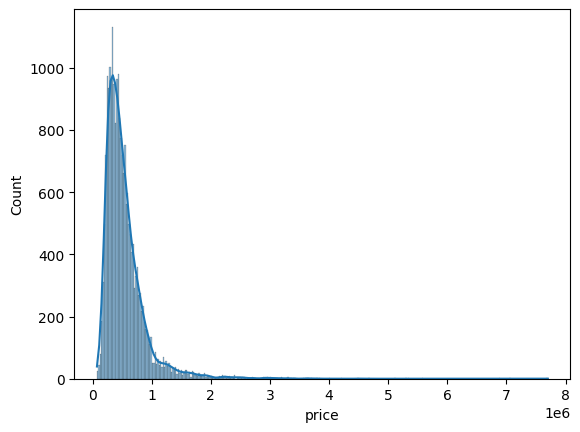

In [13]:
sns.histplot(x = target, data = df_housing, kde = True) #Vemos que mi target no es gausiano

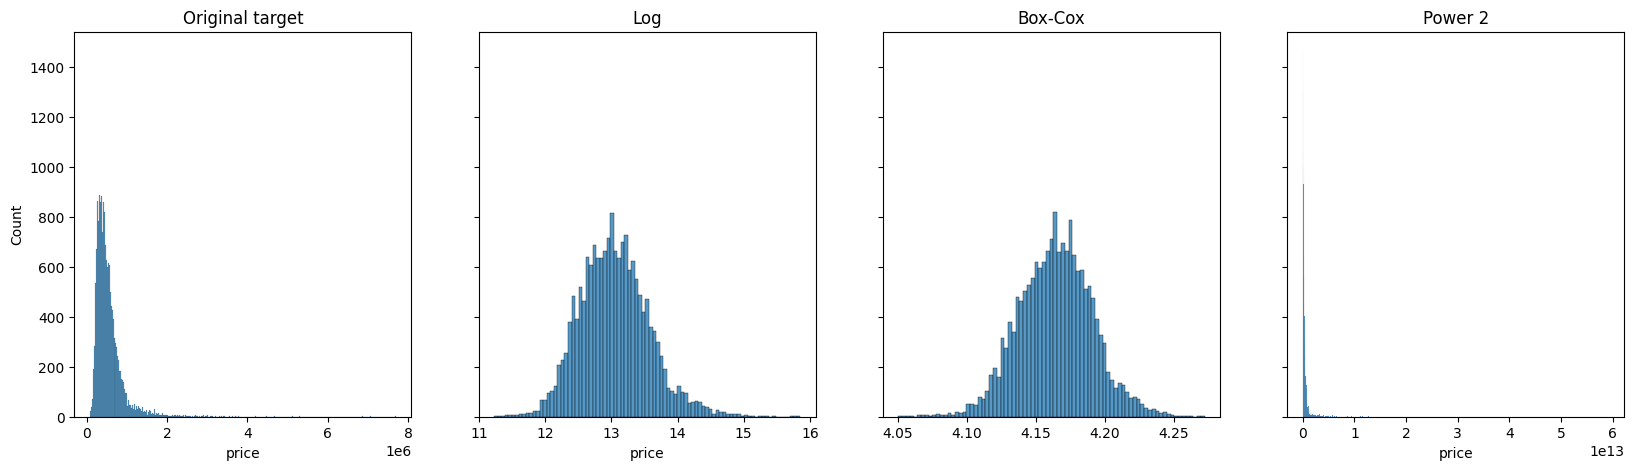

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
y_train = train_set.price

# Original target
sns.histplot(y_train, kde=False, ax=axes[0])
axes[0].set_title("Original target")

# Logaritmic
sns.histplot(np.log(y_train),kde=False, ax=axes[1])
axes[1].set_title("Log")

# Box-cox
sns.histplot(stats.boxcox(y_train)[0],kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");

# Power 2
sns.histplot(np.power(y_train, 2),kde=False, ax=axes[3])
axes[3].set_title("Power 2");

## Revisión variables

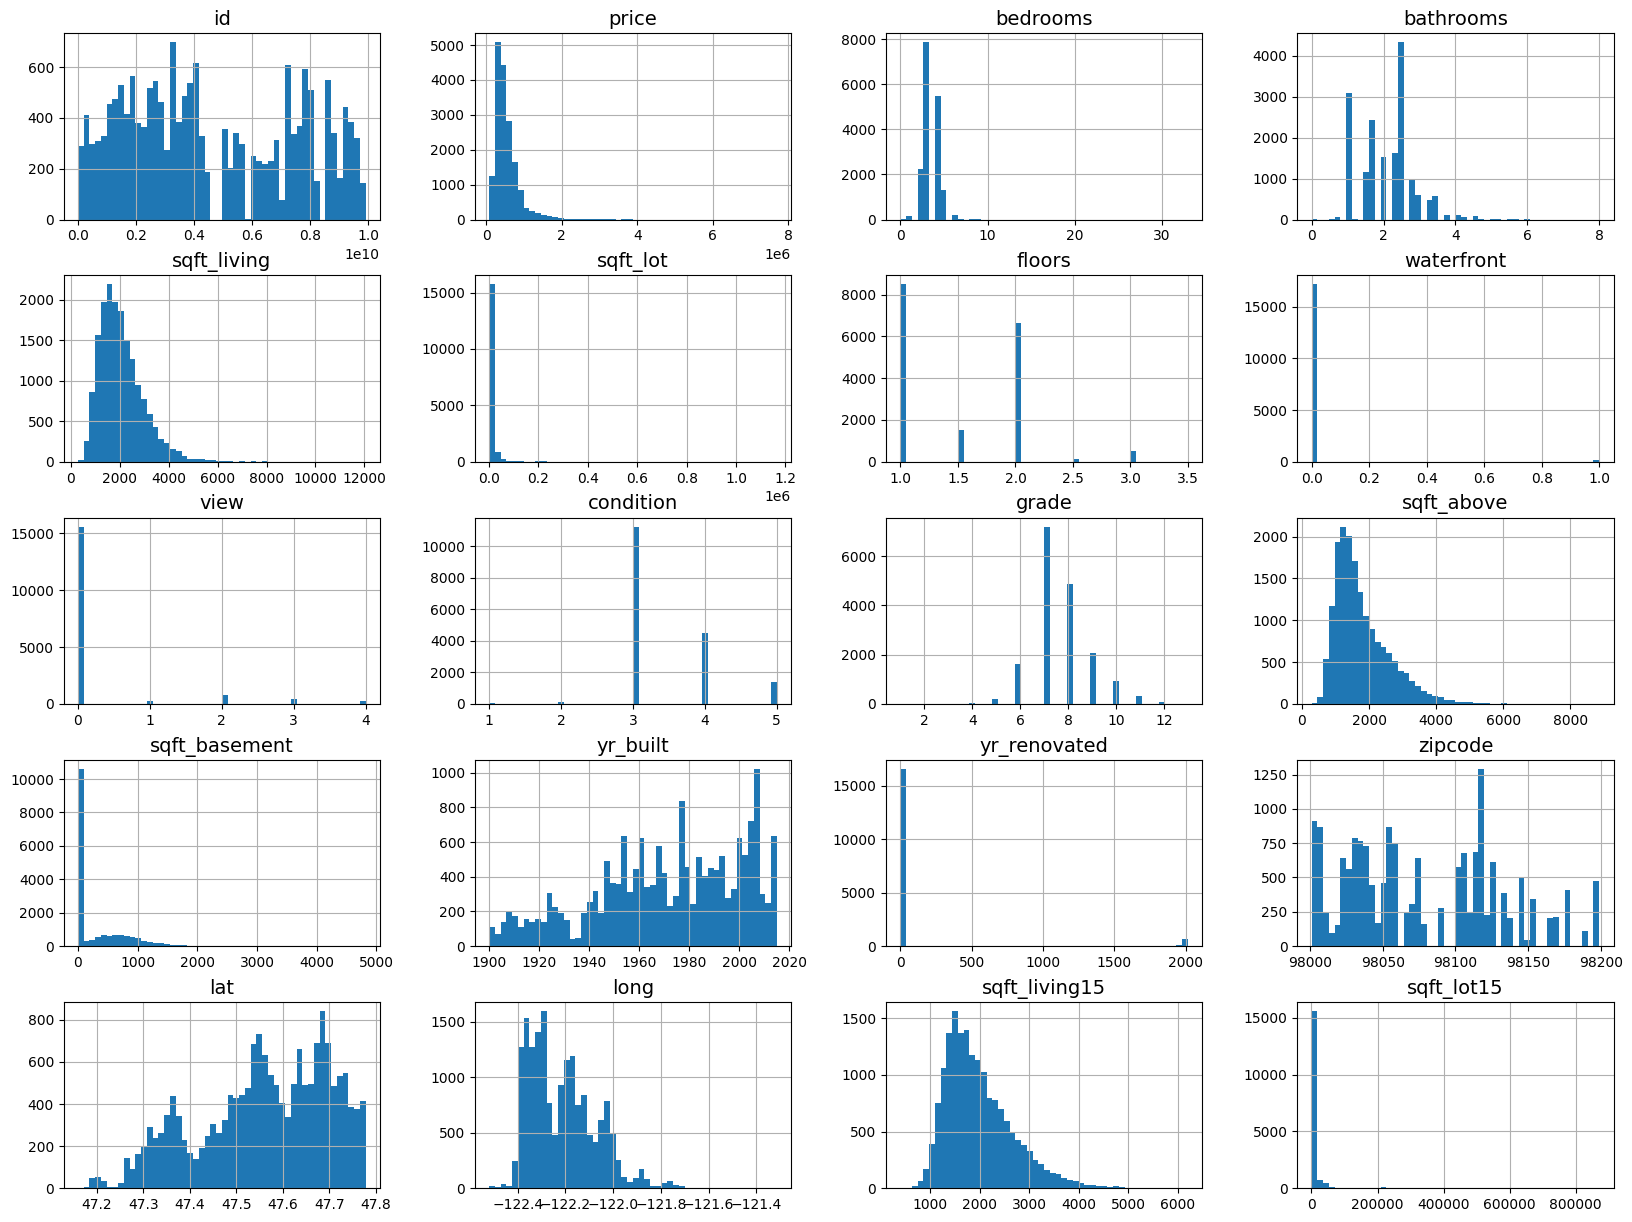

In [15]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(20, 15)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [16]:
def tipifica_variables(df, umbral_categoria=10, umbral_continua=0.90):

     # Asegúrate de que umbral_categoria es un entero
    try:
        umbral_categoria = int(umbral_categoria)
    except ValueError:
        print(f"Error: umbral_categoria debe ser un número, se recibió: {umbral_categoria}")
        return None

    # Inicializar una lista para almacenar el resultado
    sugerencias = []

    # Recorrer cada columna del DataFrame
    for col in df.columns:
        # Calcular la cardinalidad (número de valores únicos)
        cardinalidad = df[col].nunique()
        # Calcular el porcentaje de cardinalidad
        porcentaje_cardinalidad = (cardinalidad / len(df)) * 100
        
        # Determinar el tipo sugerido
        if cardinalidad == 2:
            tipo_sugerido = "Binaria"
        elif cardinalidad < umbral_categoria:
            tipo_sugerido = "Categórica"
        elif porcentaje_cardinalidad >= umbral_continua:
            tipo_sugerido = "Numerica Continua"
        else:
            tipo_sugerido = "Numerica Discreta"
        
        # Añadir la sugerencia a la lista
        sugerencias.append({
            'nombre_variable': col,
            'tipo_sugerido': tipo_sugerido
        })
    
    # Convertir la lista de sugerencias en un DataFrame
    resultado_df = pd.DataFrame(sugerencias)
    
    return resultado_df

In [17]:
tipifica_variables(train_set,10,0.90) #aunque grade la considera númerica discreta, la consideramos categórica ordinal

,nombre_variable,tipo_sugerido
0,id,Numerica Continua
1,date,Numerica Continua
2,price,Numerica Continua
3,bedrooms,Numerica Discreta
4,bathrooms,Numerica Discreta
5,sqft_living,Numerica Continua
6,sqft_lot,Numerica Continua
7,floors,Categórica
8,waterfront,Binaria
9,view,Categórica


    umbral_categoria : int, opcional (por defecto 10)
        El umbral de cardinalidad. Si una columna tiene menos valores únicos que este
        umbral, se considera categórica. Si tiene más, se considera numérica.

    umbral_continua : float, opcional (por defecto 0.90)
        Umbral de porcentaje de cardinalidad sobre el tamaño del DataFrame. Si el
        porcentaje de valores únicos en la columna es superior o igual a este umbral
        y la cardinalidad supera el umbral de categorías, la variable se considera 
        "Numérica Continua". En caso contrario, se considera "Numérica Discreta".

In [18]:
train_set.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.580770e+09,5.377686e+05,3.368074,2.113794,2073.894910,1.479895e+04,1.499161,0.007172,0.233025,3.407577,7.653846,1785.962175,287.932736,1971.108329,83.003412,98077.974378,47.560330,-122.214139,1982.904569,12725.059341
std,2.876748e+09,3.614635e+05,0.931439,0.766790,907.297963,3.883925e+04,0.542819,0.084385,0.761749,0.651698,1.170355,821.626290,438.727110,29.435603,398.503250,53.326084,0.138432,0.140498,681.232425,27525.258285
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123042e+09,3.201500e+05,3.000000,1.500000,1430.000000,5.001250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.472000,-122.329000,1480.000000,5083.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7615.000000
75%,7.305301e+09,6.400000e+05,4.000000,2.500000,2540.000000,1.060675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10046.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


*Podemos ver que según la desviación estandár (std) nos dice que hay algunas de las variables con outliers potentes, por ejemplo, sqt_living, sqft_lot, grade, sqtf_above, sqft_basement, yr_built, yr_renovated, zipcode, sqft_living15 ysqft_lot15*

*Veo que hay outliers potentes en algunas variables (lo tendré que tener en cuenta si voy a estandarizar para hacer transformaciones primero)*

*Finalmente, veo que **grade** definitivamente es categoríca y no númerica*

### Correlación de Pearson

In [19]:
corr_matrix = train_set.corr(numeric_only= True)


In [20]:
corr_matrix #esta tabla ayuda a saber la correlación y también a identificar el porque se quita una variable por colinealidad

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.020624,0.005498,0.007884,-0.012012,-0.138542,0.018734,-0.007907,0.007141,-0.026997,0.010693,-0.007586,-0.010636,0.028904,-0.020093,-0.009239,-0.008769,0.021853,-0.003015,-0.142291
price,-0.020624,1.000000,0.308297,0.526616,0.701700,0.091039,0.253424,0.252946,0.392108,0.036343,0.665093,0.603255,0.321387,0.049099,0.127737,-0.053800,0.310770,0.023485,0.582666,0.079152
bedrooms,0.005498,0.308297,1.000000,0.515327,0.575076,0.031067,0.173009,-0.010038,0.070191,0.028222,0.353527,0.474404,0.300830,0.148849,0.020927,-0.152816,-0.013299,0.126022,0.386246,0.023640
bathrooms,0.007884,0.526616,0.515327,1.000000,0.752745,0.086344,0.504126,0.063145,0.179657,-0.124764,0.664407,0.683303,0.277038,0.505649,0.051332,-0.202922,0.026761,0.221848,0.563438,0.079958
sqft_living,-0.012012,0.701700,0.575076,0.752745,1.000000,0.176264,0.348917,0.095543,0.275554,-0.056163,0.760652,0.875820,0.427831,0.315848,0.054880,-0.203540,0.053920,0.242701,0.754904,0.174895
sqft_lot,-0.138542,0.091039,0.031067,0.086344,0.176264,1.000000,-0.004670,0.027354,0.061524,-0.010531,0.116535,0.187159,0.014017,0.051956,0.015425,-0.135121,-0.078886,0.240164,0.151801,0.734932
floors,0.018734,0.253424,0.173009,0.504126,0.348917,-0.004670,1.000000,0.018441,0.027260,-0.268652,0.457274,0.518214,-0.248916,0.495168,0.005480,-0.054722,0.054014,0.121500,0.271551,-0.012202
waterfront,-0.007907,0.252946,-0.010038,0.063145,0.095543,0.027354,0.018441,1.000000,0.390616,0.017313,0.070820,0.063283,0.079072,-0.030817,0.088378,0.026815,-0.018784,-0.043843,0.075609,0.032785
view,0.007141,0.392108,0.070191,0.179657,0.275554,0.061524,0.027260,0.390616,1.000000,0.048571,0.244440,0.159612,0.270938,-0.058776,0.100026,0.084540,0.005750,-0.086336,0.276378,0.063760
condition,-0.026997,0.036343,0.028222,-0.124764,-0.056163,-0.010531,-0.268652,0.017313,0.048571,1.000000,-0.143680,-0.158199,0.180120,-0.361492,-0.061802,0.003919,-0.018660,-0.109123,-0.094194,-0.006322


In [21]:
serie_corr = np.abs(corr_matrix[target]).sort_values(ascending=False) #Vemos que las últimas 5 variables las podemos eliminar, ya que no son mayores a 0.07

serie_corr

price            1.000000
sqft_living      0.701700
grade            0.665093
sqft_above       0.603255
sqft_living15    0.582666
bathrooms        0.526616
view             0.392108
sqft_basement    0.321387
lat              0.310770
bedrooms         0.308297
floors           0.253424
waterfront       0.252946
yr_renovated     0.127737
sqft_lot         0.091039
sqft_lot15       0.079152
zipcode          0.053800
yr_built         0.049099
condition        0.036343
long             0.023485
id               0.020624
Name: price, dtype: float64

In [22]:
criterio = 0.09
features_num = serie_corr[serie_corr > criterio].index.to_list() #condition no se excluye a pesar de ser categórica, ya que ya lo elimine con el criterio
features_num.remove(target)
features_num.remove("view") #categórica
features_num.remove("grade") #categórica
features_num.remove("floors") #categórica
features_num.remove("waterfront") #categórica


In [23]:
x_train.floors.unique() #observamos que floors lo podemos clasificar como categórica


array([1. , 1.5, 2. , 2.5, 3. , 3.5])

In [24]:
features_num

['sqft_living',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'sqft_basement',
 'lat',
 'bedrooms',
 'yr_renovated',
 'sqft_lot']

In [ ]:
#columnas = corr_matrix["price"][corr_matrix["price"] > 0.09].index.to_list()

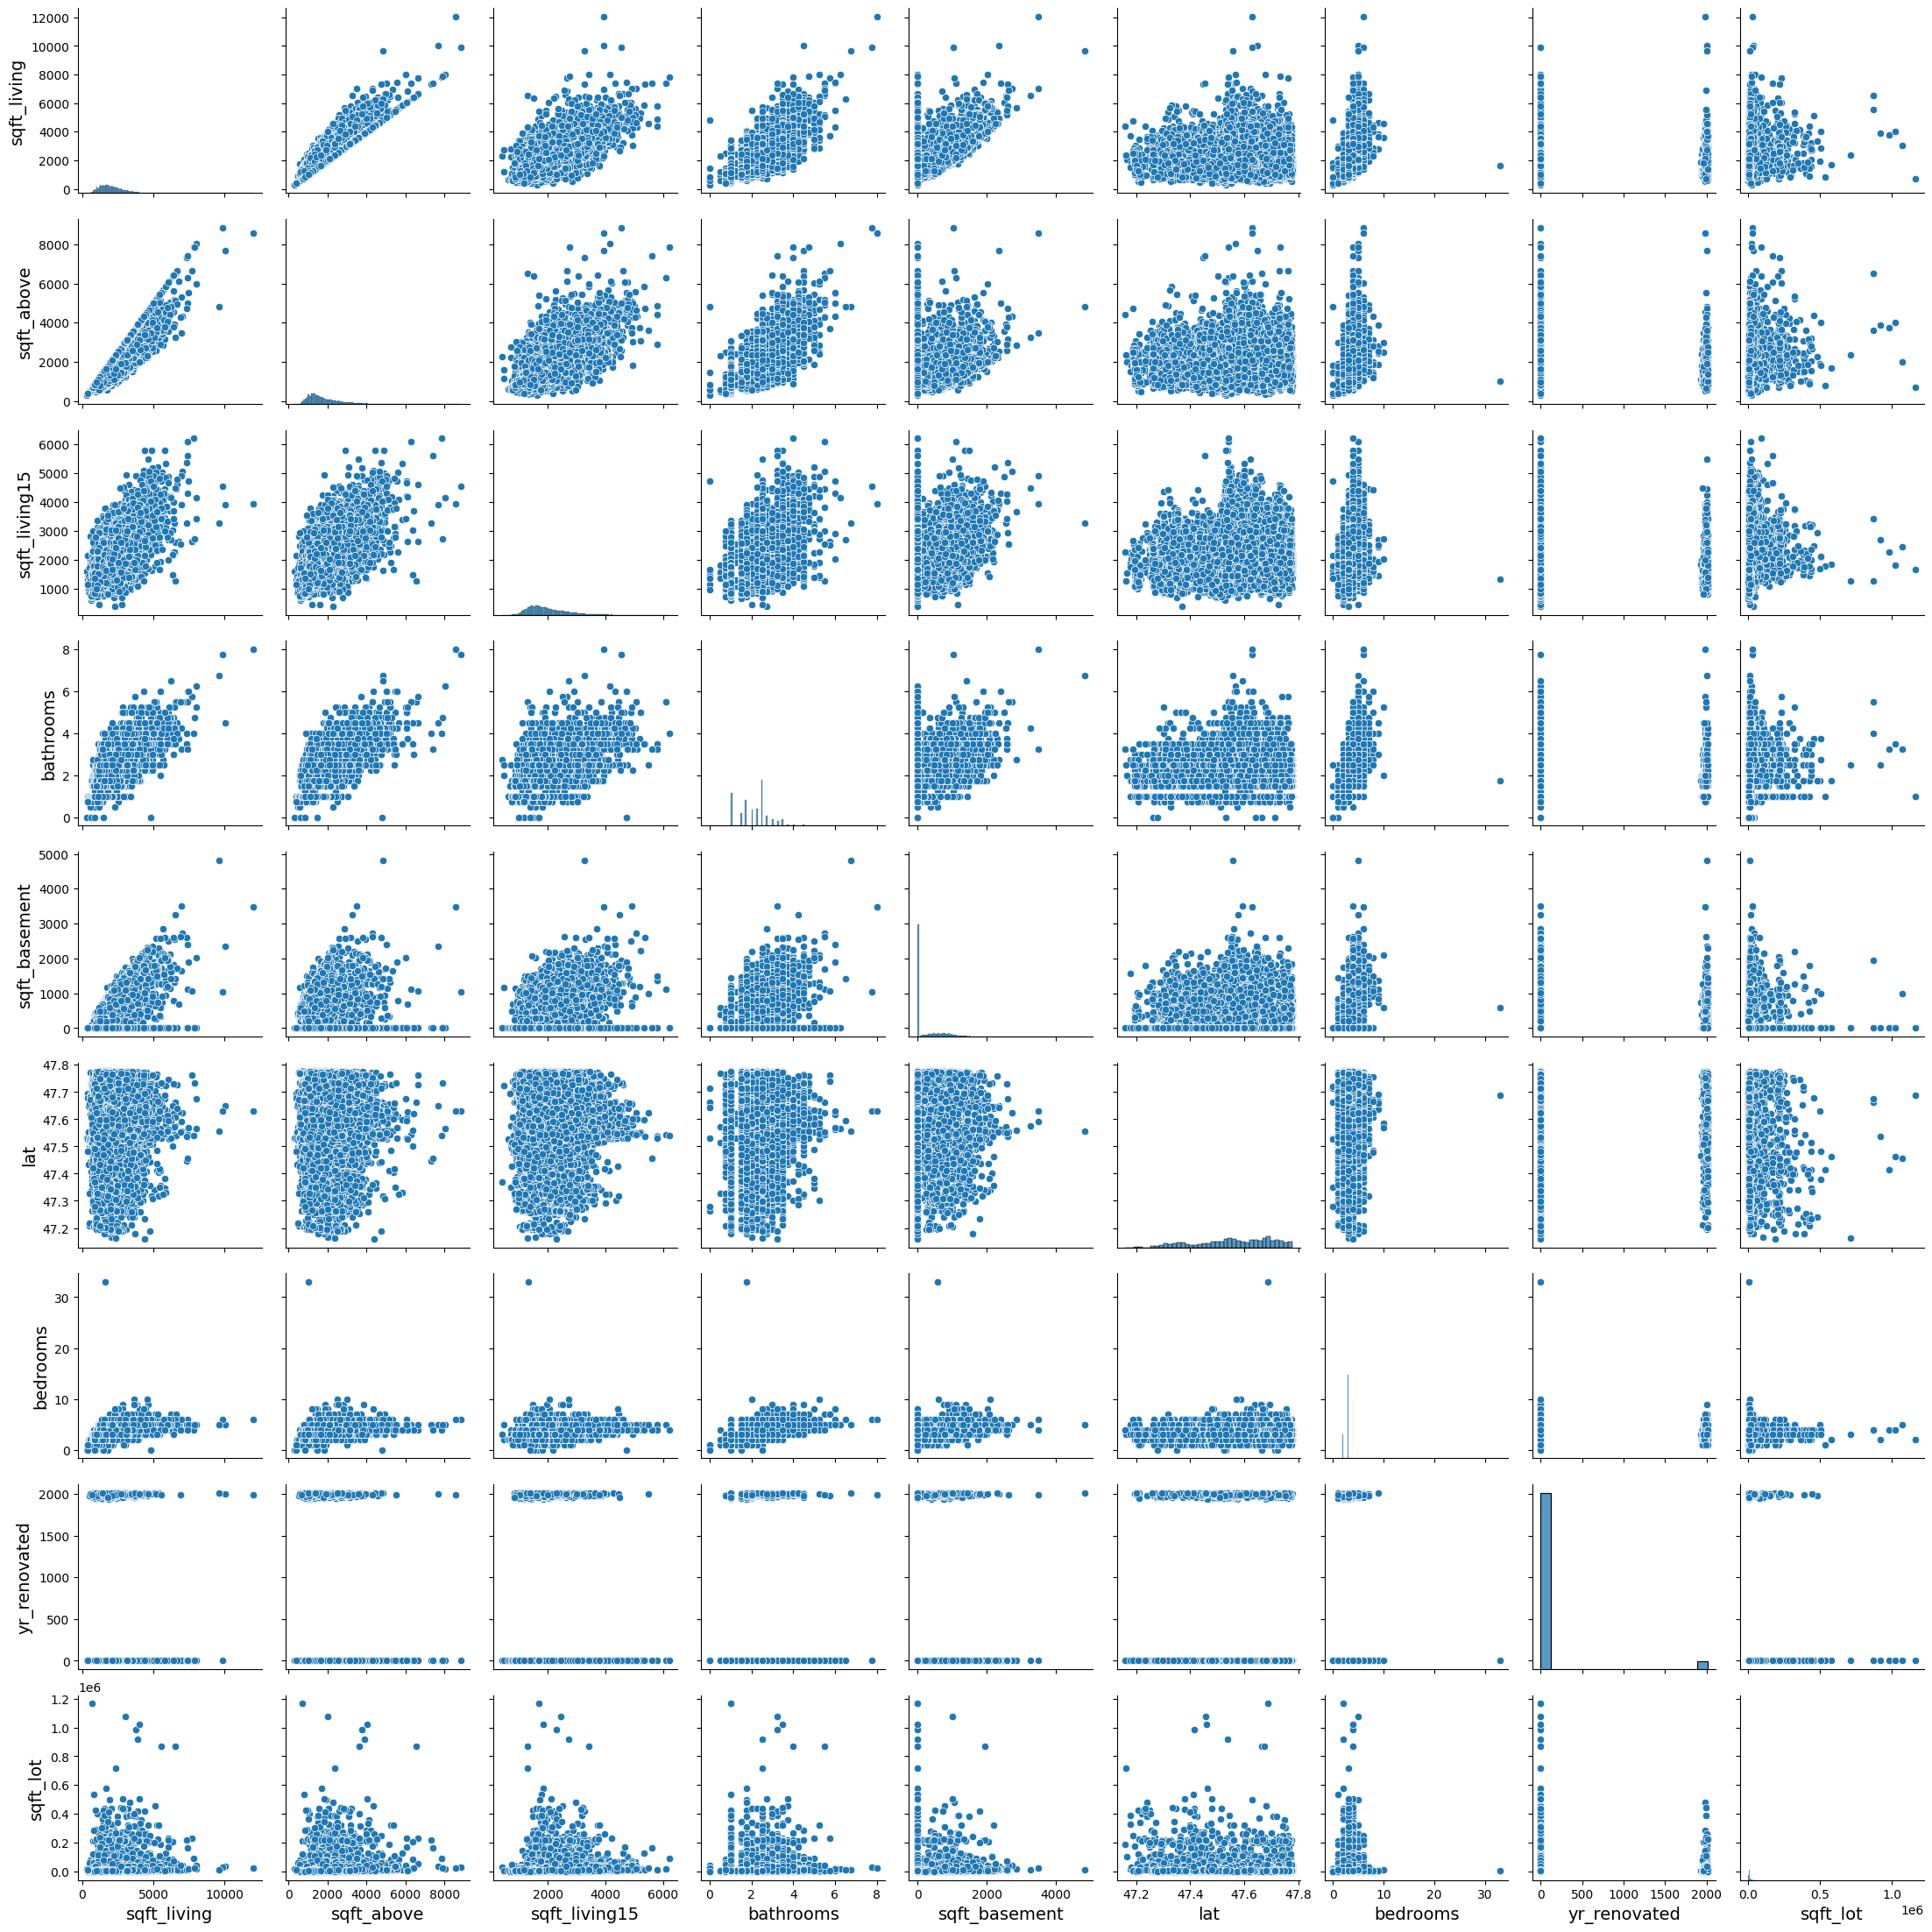

In [25]:
sns.pairplot(train_set[features_num]);

### Comprobación de colinealidad

In [26]:
criterio_col = 0.7 #Se pone 0.7 que se considera una correlación grande (este es un valor típico definido)
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr_matrix[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con sqft_living
Comprobando con id
No estaba ya en la lista original, no hago nada
Comprobando con price
No estaba ya en la lista original, no hago nada
Comprobando con bedrooms
Conmigo no tiene problema, dejo a bedrooms tranquila
Comprobando con bathrooms
Correlo al 0.7527448123448109, por eso excluyo a bathrooms
Comprobando con sqft_living
soy yo misma, no me excluyo
Comprobando con sqft_lot
Conmigo no tiene problema, dejo a sqft_lot tranquila
Comprobando con floors
No estaba ya en la lista original, no hago nada
Comprobando con waterfront
No estaba ya en la lista original, no hago nada
Comprobando con view
No estaba ya en la lista original, no hago nada
Comprobando con condition
No estaba ya en la lista original, no hago nada
Comprobando con grade
No estaba ya en la lista original, no hago nada
Comprobando con sqft_above
Correlo al 0.8758203818944853, por eso excluyo a sqft_above
Comprobando con sqft_basement
Conmigo no tiene problema, dejo a sqft_bas

In [27]:
for excluida in excluidas:
    features_num.remove(excluida)
features_num

['sqft_living', 'sqft_basement', 'lat', 'bedrooms', 'yr_renovated', 'sqft_lot']

In [28]:
excluidas #dejamos a bathrooms excluida ya que de sqft_living y bathrooms, sqft_living tiene más correlación con el target

['bathrooms', 'sqft_living15', 'sqft_above']

<Axes: >

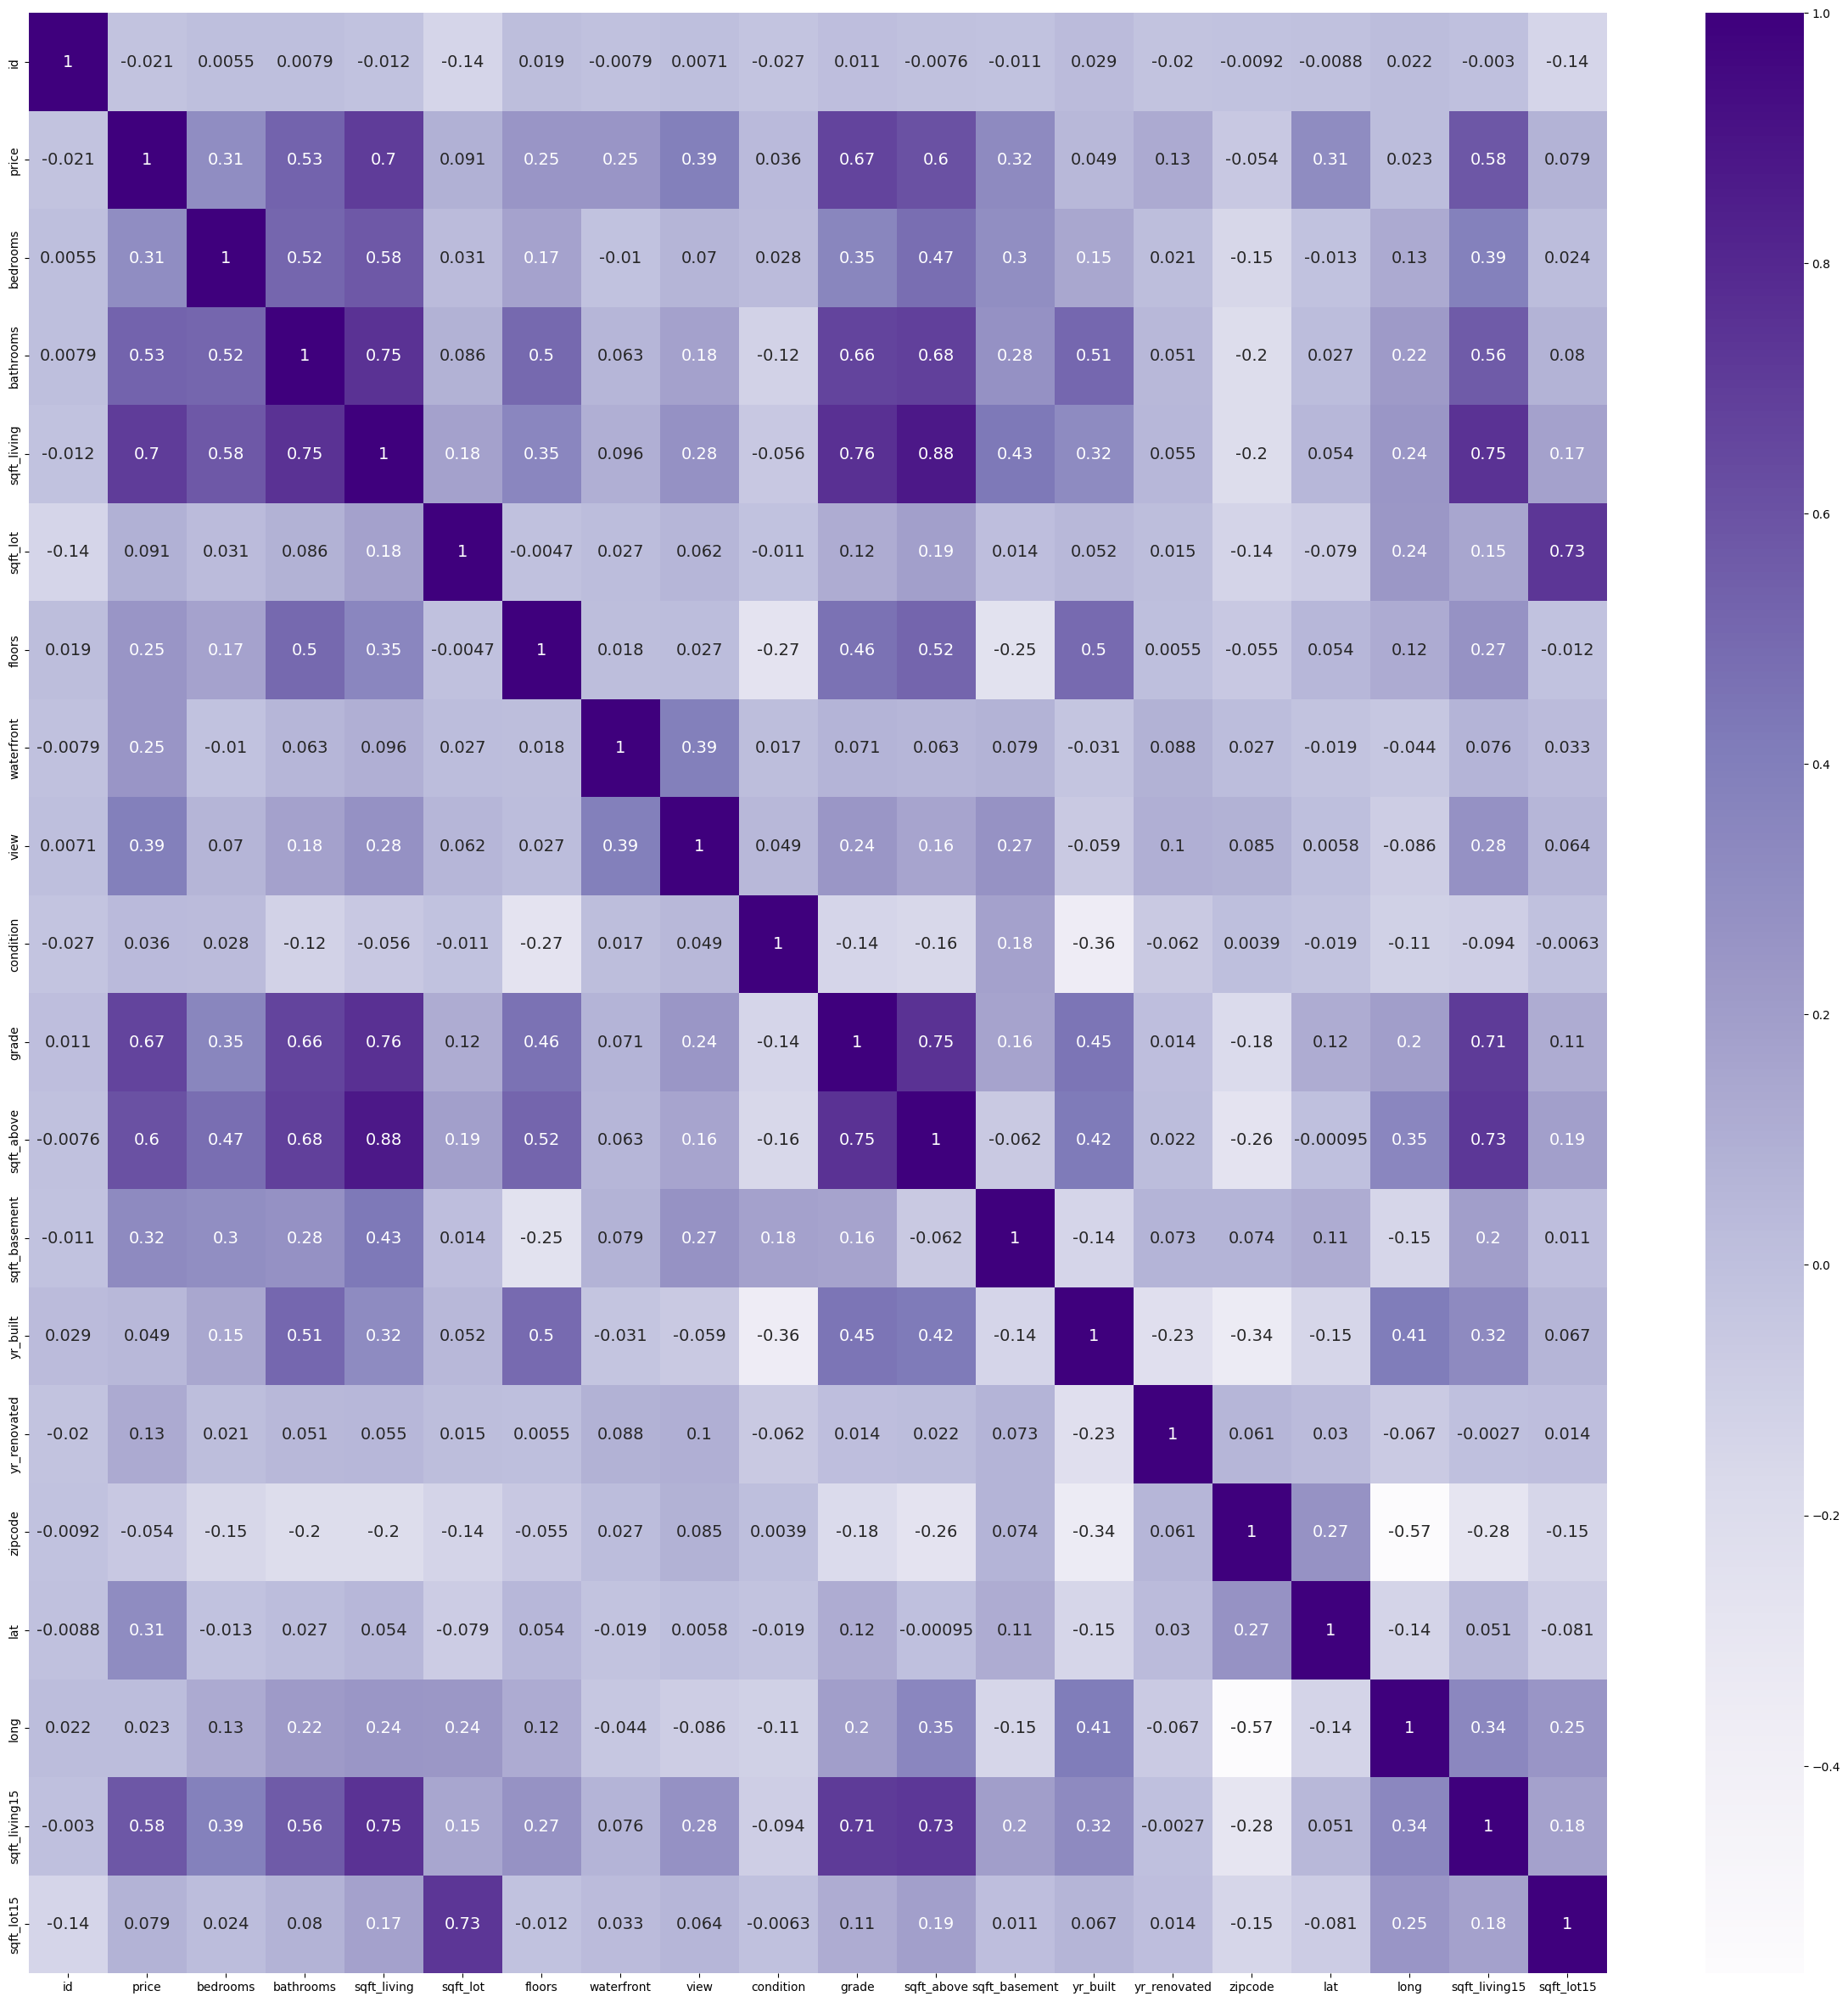

In [29]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True,cmap="Purples")

### Determinación de variables categóricas y su influencia en la predicción

In [30]:
features_cat = ["floors","view","condition","grade","waterfront"]

In [31]:
train_set.floors.value_counts(normalize=True)

floors
1.0    0.490920
2.0    0.383343
1.5    0.088086
3.0    0.029902
2.5    0.007403
3.5    0.000347
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

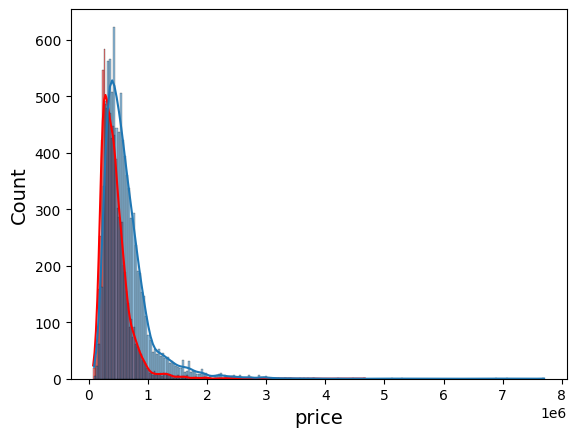

In [32]:
sns.histplot(x= target, data = train_set[train_set.floors == 1], kde = True, color = "red") #vemos que esta categorica me sirve
sns.histplot(x= target, data = train_set[train_set.floors != 1], kde = True)

In [33]:
train_set.view.value_counts(normalize=True)

view
0    0.901446
2    0.045286
3    0.022903
1    0.015905
4    0.014459
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

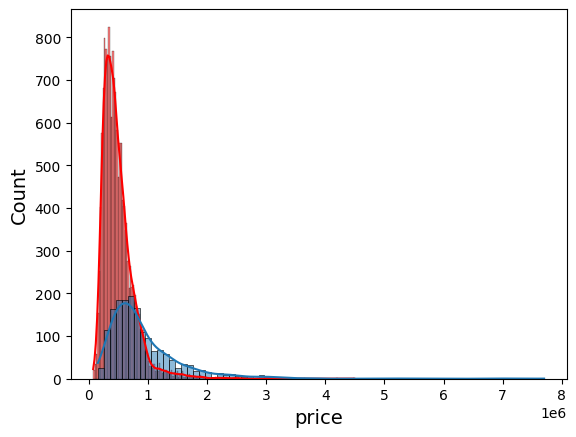

In [34]:
sns.histplot(x= target, data = train_set[train_set.view == 0], kde = True, color = "red") #vemos que esta categorica me sirve
sns.histplot(x= target, data = train_set[train_set.view != 0], kde = True)

In [35]:
train_set.condition.value_counts(normalize=True)

condition
3    0.650549
4    0.260960
5    0.078890
2    0.008039
1    0.001562
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

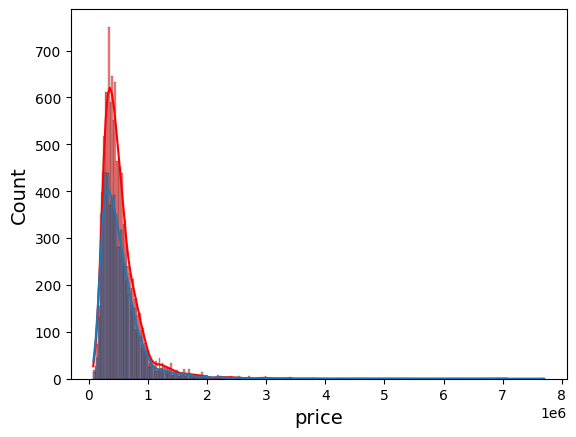

In [36]:
sns.histplot(x= target, data = train_set[train_set.condition == 3], kde = True, color = "red") #vemos que esta categorica me sirve poco
sns.histplot(x= target, data = train_set[train_set.condition != 3], kde = True)

In [37]:
train_set.grade.value_counts(normalize=True)

grade
7     0.416484
8     0.282186
9     0.119838
6     0.093696
10    0.052921
11    0.017698
5     0.010873
12    0.003991
4     0.001504
13    0.000578
3     0.000174
1     0.000058
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

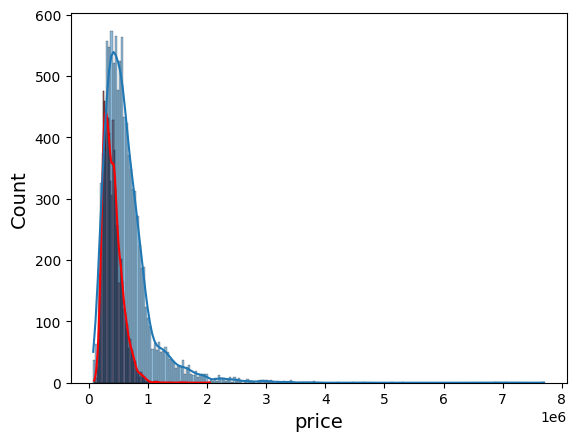

In [38]:
sns.histplot(x= target, data = train_set[train_set.grade == 7], kde = True, color = "red") #vemos que esta categorica me sirve 
sns.histplot(x= target, data = train_set[train_set.grade != 7], kde = True)

In [39]:
train_set.waterfront.value_counts(normalize=True)

waterfront
0    0.992828
1    0.007172
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

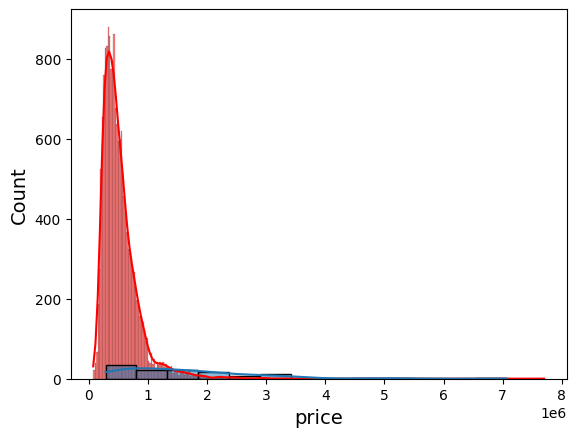

In [40]:
sns.histplot(x= target, data = train_set[train_set.waterfront == 0], kde = True, color = "red") #vemos que esta categorica me sirve 
sns.histplot(x= target, data = train_set[train_set.waterfront == 1], kde = True)

In [41]:
features_cat = ["floors","view","condition","grade","waterfront"] #de momento utilizaré todas las variables categóricas, auqnue condition de momento parece no muy útil

### Análisis de variables numéricas

In [46]:
features_num

['sqft_living', 'sqft_basement', 'lat', 'bedrooms', 'yr_renovated', 'sqft_lot']

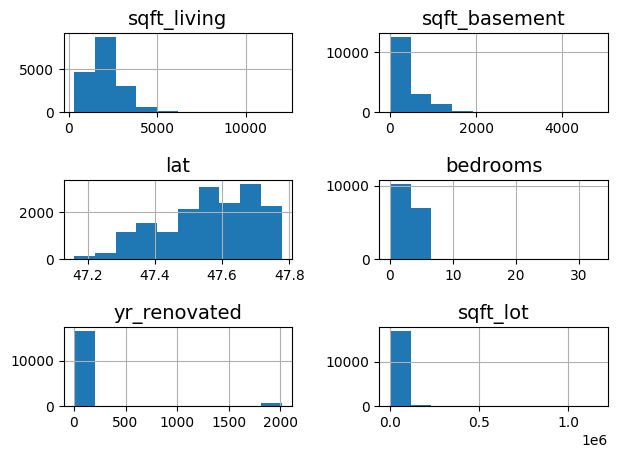

In [42]:
train_set[features_num].hist()
plt.tight_layout()

In [44]:
train_bck = train_set.copy()
train_bck2 = train_bck

Aplicamos logaritmo para mejorar la distribución, esto se hace antes de la estandarización 

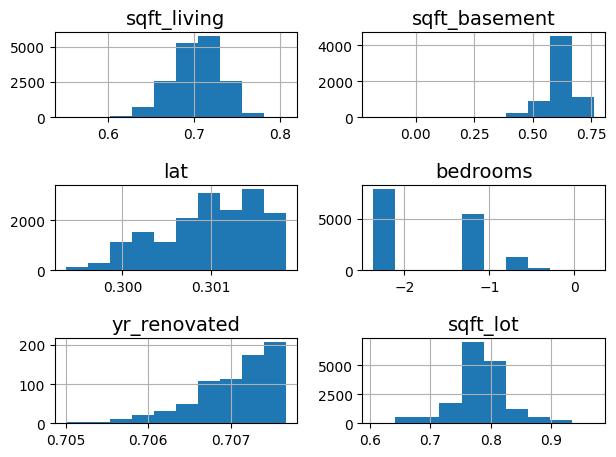

In [49]:
features_transform = ['sqft_living','sqft_basement','lat','bedrooms','yr_renovated','sqft_lot']
for feature in features_transform:
    train_set[feature] = train_set[feature].apply(np.log)

train_set[features_transform].hist()
plt.tight_layout();

### Determinación de variables númericas vs categóricas

In [ ]:
train_set.columns

In [ ]:
features = ["id", "date", "bedrooms","bathrooms","sqft_living","sqft_lot","floors",'waterfront','view','condition','grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
features_num = ["sqft_living","sqft_above","sqft_living15","bathrooms","view","sqft_basement","lat","bedrooms","floors","waterfront","yr_renovated","sqft_lot","sqft_lot15"]
target = "price"
features_cat = ["floors","view","condition","grade"]



### Análisis de categóricas

In [ ]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
pinta_distribucion_categoricas(X_train, ["floors","view","condition","grade"], relativa= True, mostrar_valores= True)

''' 
Floors: 49% tienen 1 piso, mientras que el 38% tienen 2 pisos
View: 90% de las casas no tienen una buena calidad de vista
Condition: Las condiciones de las casas son de termino medio, con un 65% con raiting 3 y un 26% con raitign 4
grade: 
'''

### Análisis de variables númericas vs categóricas

In [ ]:
def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

In [ ]:
plot_categorical_numerical_relationship(train_set,categorical_col="condition",numerical_col="price") # vemos que la condición importa en el precio cuando es entre 1 y 2, pero pasando de 3 debe afectar ptras condiciones el precio

In [ ]:
plot_categorical_numerical_relationship(train_set,categorical_col="grade",numerical_col="price") # vemos que va de menor grado, por lo tanto más ecónomicas a mayor grado con mayor coste

# Modelado

In [ ]:
# Regresor Lineal

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Arboles de decisión para Regresión 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42) # Necesita una inicialización aleatoria y la semilla permite que siempre sea la misma

In [ ]:
features = features_cat + features_num

In [ ]:
X = train_set[features].copy() 
y= train_set[target] 

In [ ]:
lin_reg.fit(X,y)
tree_reg.fit(X,y)

### Evaluación contra Train (train_error):

In [ ]:
# Primero las predicciones
train_pred_lin = lin_reg.predict(X)

train_pred_tree = tree_reg.predict(X)

In [ ]:
mse_lin = root_mean_squared_error(y, train_pred_lin) # En realidad damos la raíz cuadrada del error cuadrático medio
# que está en las mismas unidades que el target
print(mse_lin)

In [ ]:
mse_tree = root_mean_squared_error(y, train_pred_tree)
print(mse_tree) # overfitting!!!

## Conversión de variables